In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
def load_data(file_path):
    # Load the data (replace with actual data loading logic)
    data = pd.read_csv(file_path)  # Replace with your actual data file
    data.head()

    agg_data = data.groupby(['epoch', 't_bin'])["t_loss"].mean().reset_index()
    agg_data["loss_median"] = data.groupby(['epoch', 't_bin'])["t_loss"].quantile(0.5).values
    agg_data["loss_lower"] = data.groupby(['epoch', 't_bin'])["t_loss"].quantile(0.25).values
    agg_data["loss_upper"] = data.groupby(['epoch', 't_bin'])["t_loss"].quantile(0.75).values

    agg_data.head()

    return agg_data

In [7]:
def plot_loss_with_shaded_area(df):
    # Extract unique epochs
    epochs = df['epoch'].unique()
    
    # Plot a line for each epoch with shaded area for 25th and 75th percentiles
    plt.figure(figsize=(10, 6))

    for epoch in epochs:
        epoch_data = df[df['epoch'] == epoch]
        t_bins = epoch_data['t_bin']

        # Plot the line
        plt.plot(t_bins, epoch_data["loss_median"], label=f'Epoch {epoch}')
        
        # Add shaded area
        plt.fill_between(t_bins, epoch_data['loss_lower'], epoch_data['loss_upper'], alpha=0.2)

    plt.xlabel('t_bin')
    plt.ylabel('t_loss')
    plt.title('t_loss vs t_bin for each epoch with 25th-75th percentile area')
    plt.legend()
    plt.grid(True)
    plt.show()

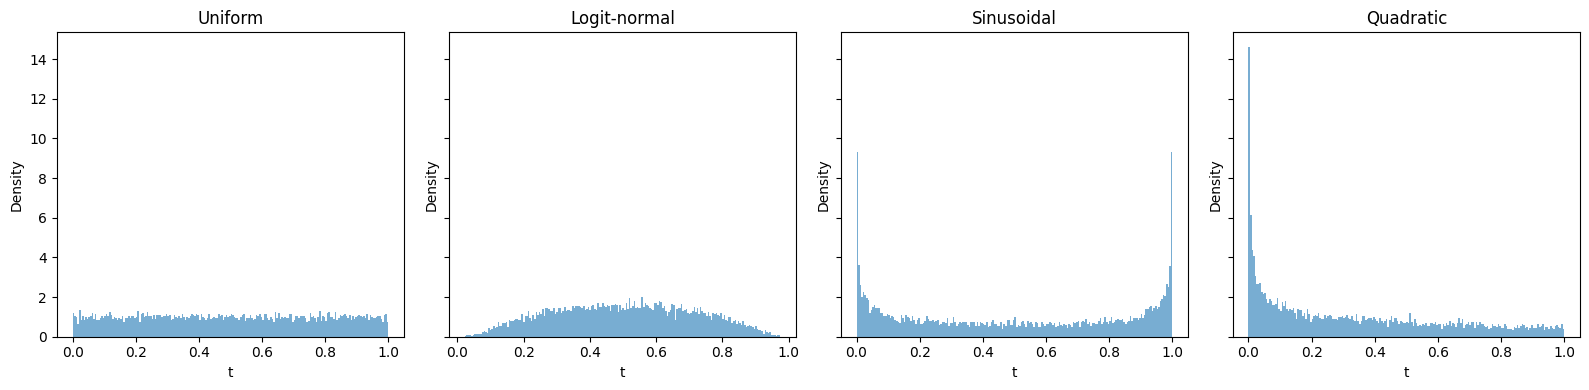

In [9]:
import torch

def plot_all_distributions():
    # Number of samples and device
    b = 10000
    device = 'cpu'

    # Generate samples for each distribution
    distributions = {
        "Uniform": torch.rand((b,)).to(device).numpy(),
        "Logit-normal": torch.sigmoid(torch.randn((b,)).to(device)).numpy(),
        "Sinusoidal": (0.5 + 0.5 * torch.sin(torch.pi * (torch.rand((b,)).to(device) - 0.5))).numpy(),
        "Quadratic": (torch.rand((b,)).to(device) ** 2).numpy()
    }

    # Plot the distributions
    fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

    for ax, (name, dist) in zip(axes, distributions.items()):
        ax.hist(dist, bins=200, density=True, alpha=0.6, label=name)
        ax.set_title(name)
        ax.set_xlabel("t")
        ax.set_ylabel("Density")

    plt.tight_layout()
    plt.show()

plot_all_distributions()


### Uniform Sampling

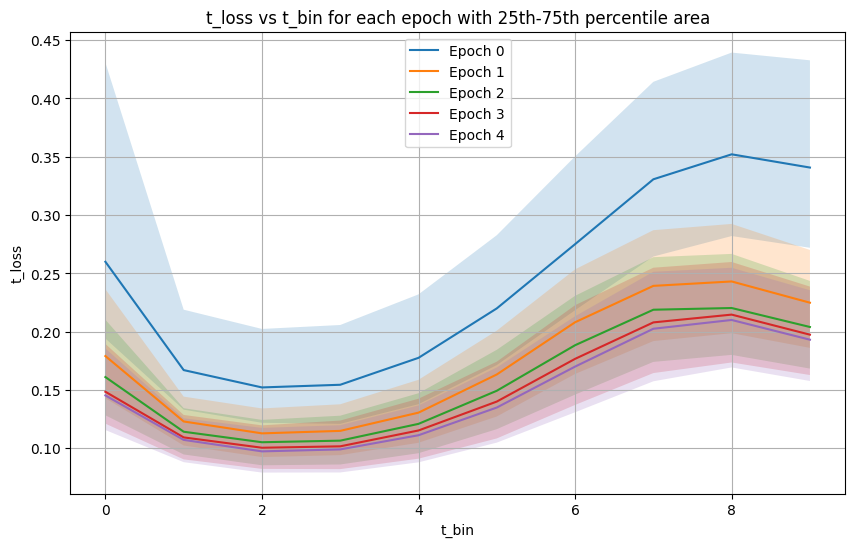

In [ ]:
uniform_data = load_data("uniform_sample_log.csv")
plot_loss_with_shaded_area(uniform_data)

### Logit-Normal Sampling (Standard RF)

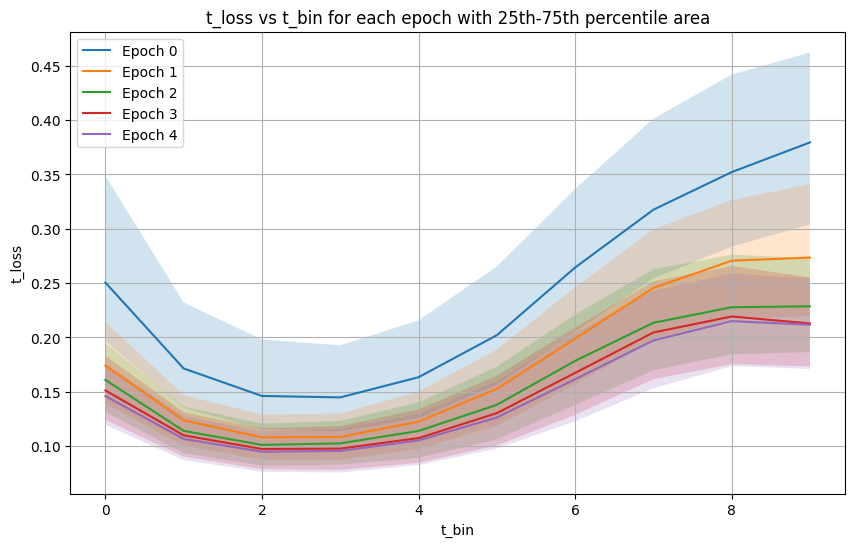

In [ ]:
logit_normal = load_data("log_normal_sample_log.csv")
plot_loss_with_shaded_area(logit_normal)